# Import libary

In [82]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

In [83]:
def find_closest_centroids(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [84]:
def calculate_centroids(X, labels, k_clusters):
    centroids = np.array([np.mean(X[labels == i], axis=0) if np.any(labels == i) else np.zeros(X.shape[1]) for i in range(k_clusters)])
    return centroids


In [85]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    centroid_history = []
    centroids = init_centroids
    for _ in range(max_iter):
        centroid_history.append(centroids)
        labels = find_closest_centroids(img_1d, centroids)
        centroids = calculate_centroids(img_1d, labels, k_clusters)
        if np.allclose(centroid_history[-1], centroids, atol= 0.1):
            print("Iter (number of repeat time):", _ + 1)
            return labels, centroid_history
    return labels, centroid_history


In [86]:
def choose_in_pixels_centroids(X, k_clusters):
    random_indices = np.random.choice(range(X.shape[0]), size=k_clusters, replace=False)
    return X[random_indices]

In [87]:
def choose_random_centroids(X, k_clusters):
    centroids = np.random.randint(0, 256, size=(k_clusters, X.shape[1]))
    return centroids

In [88]:
def input_information():
    image_file = input("Input image file: ")
    k_clusters = int(input("Input k clusters: "))
    max_iter = int(input("Input max iterator: "))
    init_centroids = input("Input init centroids type (random/in_pixels): ")
    output_format = input("Input the output image extension (pdf/png): ")
    return image_file, k_clusters, max_iter, init_centroids, output_format

In [89]:
def print_image_information(image_file):
    try:
        # Đọc hình ảnh
        image = Image.open(image_file)

        # Lấy thông tin hình ảnh
        image_shape = image.size
        image_width, image_height = image.size
        num_channels = len(image.getbands())
        image_dtype = image.mode
        image_size = image_height* image_width

        # In thông tin hình ảnh
        print("ORIGINAL IMAGE INFORMATION")
        print("Image shape:", image_shape)
        # print("Image size: ", image_size, " bytes")
        print("Image width:", image_width, " pixels")
        print("Image height:", image_height, " pixels")
        print("Image dimension:", num_channels)
        print("Image type:", image_dtype)
    except IOError:
        print("Can not read image")

In [90]:
def image_handler(image_file, k_clusters, max_iter = 300, init_centroids = 'random'):
# Đọc ảnh và chuyển thành mảng numpy
    image = Image.open(image_file)
    image_np = np.array(image)

    # Chuyển đổi ảnh thành 1D array
    img_1d = image_np.reshape(-1, 3) / 255  # Reshape và chuẩn hóa giá trị [0, 1]

    # Thực hiện K-Means
    if init_centroids == 'random':
        initial_centroids = choose_random_centroids(img_1d, k_clusters)
    if init_centroids == 'in_pixels':
        initial_centroids = choose_in_pixels_centroids(img_1d, k_clusters)
    start_time = time.time()
    labels, centroid_history = kmeans(img_1d, k_clusters, max_iter, initial_centroids)
    end_time = time.time()
    # Tạo ảnh mới từ các centroid và nhãn
    final_centroids = centroid_history[-1]
    final_image = final_centroids[labels].reshape(image_np.shape)

    # Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title("Original Image")
    axs[0].imshow(image_np)
    axs[0].axis('off')
    axs[1].set_title(f"Reduced Image (k={k_clusters}, iter={max_iter}, init={init_centroids})")
    axs[1].imshow(final_image)
    axs[1].axis('off')
    plt.show()
    print("Run time: ", end_time - start_time)
    print("Final centroid: ", final_centroids * 255)
    print("Centroid_history: ", centroid_history)
    print("Labels: ", labels)
    return final_image

In [91]:
def save_image(final_image, output_format = "output.png"):
    # Lưu ảnh đầu ra
    if output_format == "png":
        output_file = "output.png"
    elif output_format == "pdf":
        output_file = "output.pdf"
    Image.fromarray((final_image * 255).astype(np.uint8)).save(output_file)
    
    print("Save output image successfully!")


In [92]:
def main():
    image_file, k_clusters, max_iter, init_centroids, output_format = input_information()
    print_image_information(image_file)
    final_image = image_handler(image_file, k_clusters, max_iter, init_centroids)
    save_image(final_image, output_format)

ORIGINAL IMAGE INFORMATION
Image shape: (1000, 562)
Image width: 1000  pixels
Image height: 562  pixels
Image dimension: 3
Image type: RGB
Iter (number of repeat time): 1


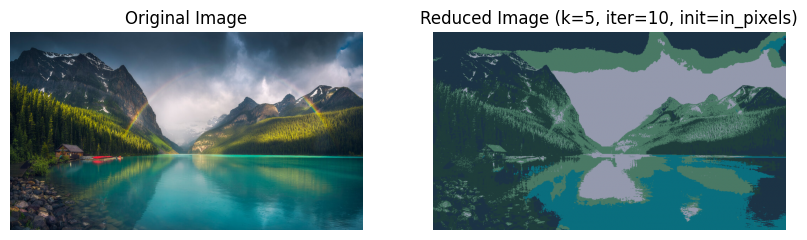

Run time:  0.3820149898529053
Final centroid:  [[ 31.  61.  59.]
 [ 10. 110. 126.]
 [ 74. 121. 101.]
 [148. 153. 173.]
 [ 28.  51.  69.]]
Centroid_history:  [array([[0.12156863, 0.23921569, 0.23137255],
       [0.03921569, 0.43137255, 0.49411765],
       [0.29019608, 0.4745098 , 0.39607843],
       [0.58039216, 0.6       , 0.67843137],
       [0.10980392, 0.2       , 0.27058824]])]
Labels:  [4 4 4 ... 1 1 1]
Save output image successfully!


In [93]:
if __name__ == "__main__":
    main()